In [3]:
!pip install -U scikit-learn


Requirement already up-to-date: scikit-learn in c:\users\dell\documents\trans\lib\site-packages (1.0)


In [4]:
import os
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ModuleNotFoundError: No module named 'xgboost'

In [5]:
import sklearn
print(sklearn.__version__)


1.0


In [6]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def preprocess_review(review):
    soup = BeautifulSoup(review, "html.parser")
    review = soup.get_text()
    review = re.sub('\[[^]]*\]', ' ', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    review = [word.strip() for word in review if word not in set(stopwords.words('english'))]
    review = [lemmatizer.lemmatize(word) for word in review]
    return " ".join(review)

In [7]:
import pandas as pd
DATA_PATH = "IMDB Dataset.csv"

data = pd.read_csv(DATA_PATH)
data.head()






,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
data.info()
data=data.sample(2000,random_state=2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


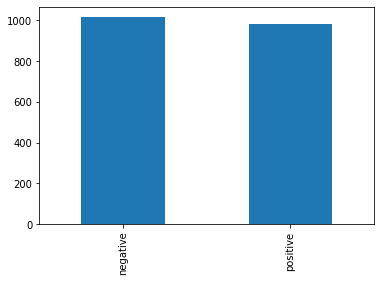

In [9]:
import matplotlib.pyplot as plt
data["sentiment"].value_counts().plot(kind="bar")
plt.show()

In [11]:
reviews = data["review"].values
sentiments = data["sentiment"].values
reviews.shape, sentiments.shape


((2000,), (2000,))

In [12]:
pip install sklearn


Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test, y_train, y_test = train_test_split(reviews, sentiments, test_size = 0.2, random_state = 24)
X_train.shape, y_train.shape

((1600,), (1600,))

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tf_idf = TfidfVectorizer(ngram_range=(1,3))
X_train = tf_idf.fit_transform(X_train)
X_test = tf_idf.transform(X_test)
X_train.shape, X_test.shape

((1600, 487413), (400, 487413))

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [33]:
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)
preds = mnb_model.predict(X_test)
print(accuracy_score(y_test, preds))
confusion_matrix(y_test, preds)

0.6725


array([[189,   4],
       [127,  80]], dtype=int64)

In [19]:
tf_idf = TfidfVectorizer(ngram_range=(1,3))
X = tf_idf.fit_transform(reviews)

In [34]:
mnb_model = MultinomialNB()
mnb_model.fit(X, sentiments)
preds = mnb_model.predict(X)
print(accuracy_score(sentiments, preds))
confusion_matrix(sentiments, preds)

1.0


array([[1017,    0],
       [   0,  983]], dtype=int64)

In [21]:
X.shape

(2000, 595925)

In [22]:
import pickle

In [23]:
pickle.dump(mnb_model, open("sentiment_classifier.pkl", "wb"))
pickle.dump(tf_idf, open("tf_idf.pkl", "wb"))

In [24]:
mnb_model.predict(X[0])[0]

'negative'

In [25]:
sentiments[1:10]

array(['negative', 'positive', 'positive', 'positive', 'negative',
       'negative', 'positive', 'negative', 'positive'], dtype=object)

In [26]:
sentiments[5]

'negative'

In [27]:
X[0].shape

(1, 595925)

In [35]:
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [45]:
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)
preds = mnb_model.predict(X_test)
print(f1_score(y_test, preds,average='micro'))
confusion_matrix(y_test, preds)

0.6725


array([[189,   4],
       [127,  80]], dtype=int64)

In [46]:
mnb_model = MultinomialNB()
mnb_model.fit(X, sentiments)
preds = mnb_model.predict(X)
print(f1_score(sentiments, preds,average='micro'))
confusion_matrix(sentiments, preds)

1.0


array([[1017,    0],
       [   0,  983]], dtype=int64)